#Object Detection Using RCNN
**CNN Model : CNN with Dropout=0.25 , Bounding Box**

Artificial Neural Networks Course 1400-2  
Department of Computer Science, Shahid Beheshti University

Presented by Sara Charmchi  
Student ID : 400422066  
Advisor : Dr.Katanforoush  

## Ships in Satellite Imagery

Dataset: [Classify ships in San Franciso Bay using Planet satellite imagery](https://www.kaggle.com/datasets/rhammell/ships-in-satellite-imagery)  

An implementation of RCNN algorithm for object detection using satellite imagery dataset based on the papaer : [Girshick et al., 2014](https://d2l.ai/chapter_references/zreferences.html#girshick-donahue-darrell-ea-2014)


# Import Packages

In [1]:
import json, sys, random
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras import initializers, layers, models
%matplotlib inline
from PIL import Image, ImageDraw 
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

#Load dataset

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saracharmchi","key":"cd5bd2a72d556a3aac50896f2bdf8efd"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d rhammell/ships-in-satellite-imagery

 94% 174M/185M [00:00<00:00, 207MB/s]
100% 185M/185M [00:01<00:00, 186MB/s]


In [5]:
!kaggle datasets download -d apollo2506/satellite-imagery-of-ships

 89% 41.0M/45.8M [00:00<00:00, 115MB/s] 
100% 45.8M/45.8M [00:00<00:00, 116MB/s]


In [6]:
!ls

kaggle.json  satellite-imagery-of-ships.zip
sample_data  ships-in-satellite-imagery.zip


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('ships-in-satellite-imagery.zip', 'r')
zip_ref.extractall('files_original')
zip_ref.close()

In [8]:
!ls

files_original	sample_data			ships-in-satellite-imagery.zip
kaggle.json	satellite-imagery-of-ships.zip


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('satellite-imagery-of-ships.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [10]:
# download dataset from json object
np.random.seed(42)
f = open(r'/content/files_original/shipsnet.json')
dataset = json.load(f)
f.close()
input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')
input_data.shape

(4000, 19200)

#CNN with Dropout=0.25

In [11]:
n_spectrum = 3 # color chanel (RGB)
weight = 80
height = 80
X = input_data.reshape([-1, n_spectrum, weight, height])
y = to_categorical(output_data, 2)
indexes = np.arange(4000)
np.random.shuffle(indexes)
X_train = X[indexes].transpose([0,2,3,1])
y_train = y[indexes]
X_train = X_train/255

In [12]:
np.random.seed(42)
X_train.shape

(4000, 80, 80, 3)

In [13]:
import tensorflow
opt = tensorflow.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
#CNN with Dropout=0.25
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model1.add(Dropout(0.25))

model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model1.add(Dropout(0.25))

model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model1.add(Dropout(0.25))

model1.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.25))

model1.add(Dense(2, activation='softmax'))
# optimization setup
model1.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])


In [14]:
# training
history=model1.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=25,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

Epoch 1/25
100/100 - 12s - loss: 0.3425 - accuracy: 0.8494 - val_loss: 0.1751 - val_accuracy: 0.9425 - 12s/epoch - 122ms/step
Epoch 2/25
100/100 - 1s - loss: 0.1764 - accuracy: 0.9278 - val_loss: 0.1206 - val_accuracy: 0.9638 - 871ms/epoch - 9ms/step
Epoch 3/25
100/100 - 1s - loss: 0.1434 - accuracy: 0.9416 - val_loss: 0.1049 - val_accuracy: 0.9700 - 1s/epoch - 11ms/step
Epoch 4/25
100/100 - 1s - loss: 0.1059 - accuracy: 0.9569 - val_loss: 0.0815 - val_accuracy: 0.9725 - 1s/epoch - 12ms/step
Epoch 5/25
100/100 - 1s - loss: 0.0948 - accuracy: 0.9656 - val_loss: 0.0753 - val_accuracy: 0.9775 - 1s/epoch - 12ms/step
Epoch 6/25
100/100 - 1s - loss: 0.0745 - accuracy: 0.9744 - val_loss: 0.0529 - val_accuracy: 0.9800 - 880ms/epoch - 9ms/step
Epoch 7/25
100/100 - 1s - loss: 0.0663 - accuracy: 0.9769 - val_loss: 0.0335 - val_accuracy: 0.9887 - 814ms/epoch - 8ms/step
Epoch 8/25
100/100 - 1s - loss: 0.0429 - accuracy: 0.9856 - val_loss: 0.0518 - val_accuracy: 0.9875 - 817ms/epoch - 8ms/step
Epoch

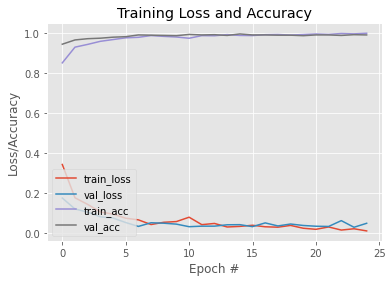

In [19]:
# plot the training loss and accuracy
N = 25
H = history
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

In [17]:
#saving the model and model weights for convolution network with dropout
from keras.models import load_model
model1.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
model1.save_weights('my_model_weights.h5')

In [18]:
image = Image.open('/content/files_original/scenes/scenes/sfbay_1.png')
pix = image.load()
n_spectrum = 3
width = image.size[0]
height = image.size[1]

#Bounding Box

In [20]:
# creat vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)

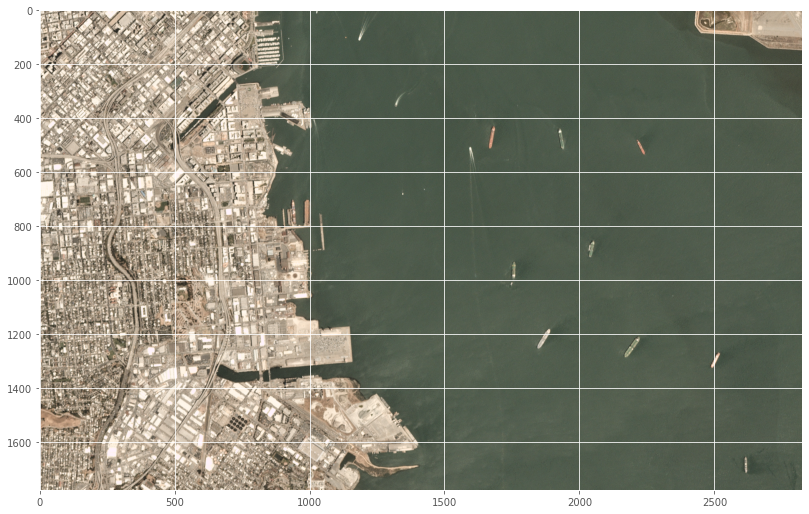

In [21]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()

In [22]:
picture_tensor = picture_tensor.transpose(2,0,1)

In [23]:
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

In [24]:
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

In [25]:
def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

X:800 Y:10  [[0.00382555 0.99617445]]


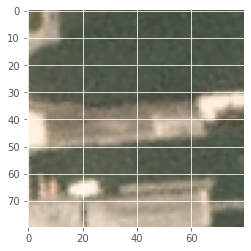

X:2620 Y:70  [[0.05596921 0.94403076]]


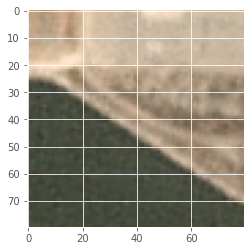

X:1640 Y:410  [[0.09151015 0.9084898 ]]


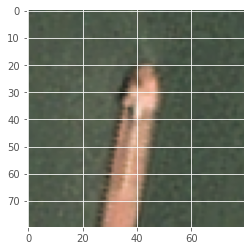

X:1890 Y:430  [[0.00111075 0.99888927]]


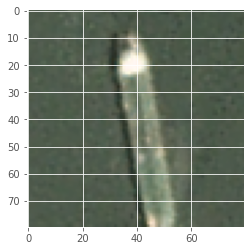

X:2190 Y:460  [[0.00756268 0.9924373 ]]


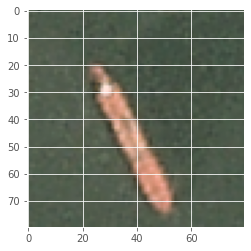

X:870 Y:480  [[0.00268568 0.9973143 ]]


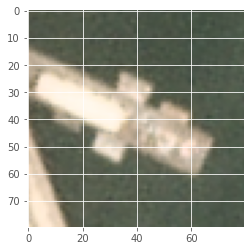

X:1560 Y:500  [[0.04753303 0.95246696]]


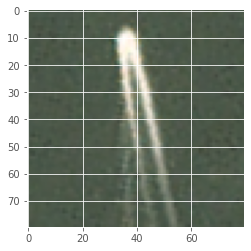

X:950 Y:690  [[0.00698917 0.9930108 ]]


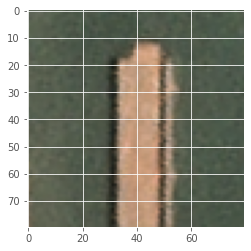

X:1010 Y:800  [[0.09274536 0.90725464]]


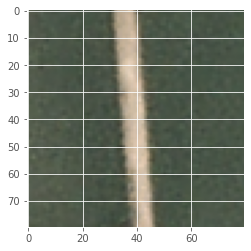

X:2000 Y:850  [[0.01342771 0.98657227]]


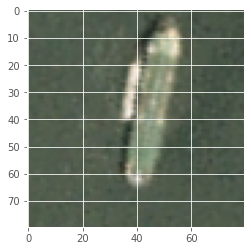

X:1720 Y:920  [[0.00557681 0.9944232 ]]


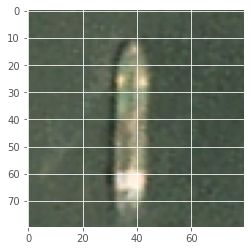

X:1830 Y:1170  [[0.00294243 0.99705756]]


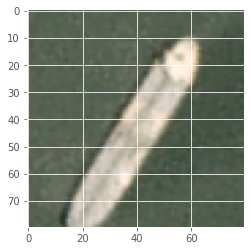

X:2160 Y:1200  [[0.00224682 0.9977532 ]]


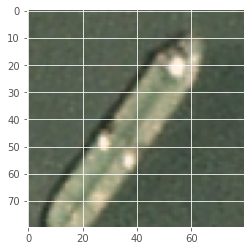

X:1050 Y:1260  [[0.07957553 0.9204245 ]]


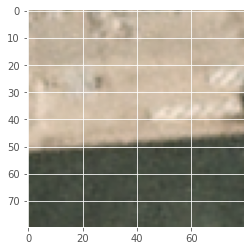

X:2460 Y:1260  [[7.769369e-04 9.992231e-01]]


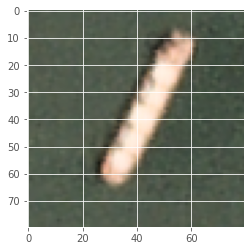

X:940 Y:1270  [[0.03722975 0.9627703 ]]


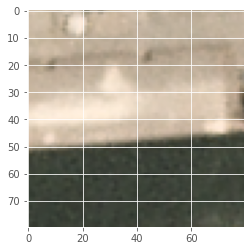

X:1290 Y:1480  [[0.00440139 0.99559855]]


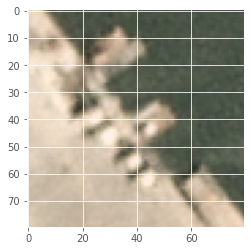

X:1290 Y:1590  [[0.05536068 0.9446393 ]]


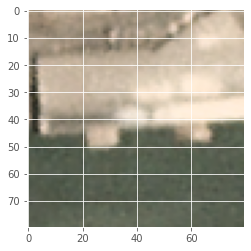

X:2580 Y:1640  [[0.04381747 0.9561825 ]]


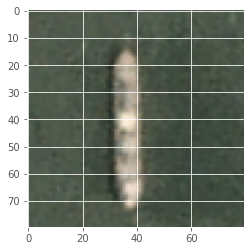

X:2740 Y:1690  

In [26]:
#CNN with Dropout
step = 10; coordinates = []
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        result = model1.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

In [27]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

In [28]:
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape
(1777, 2825, 3)


(1777, 2825, 3)

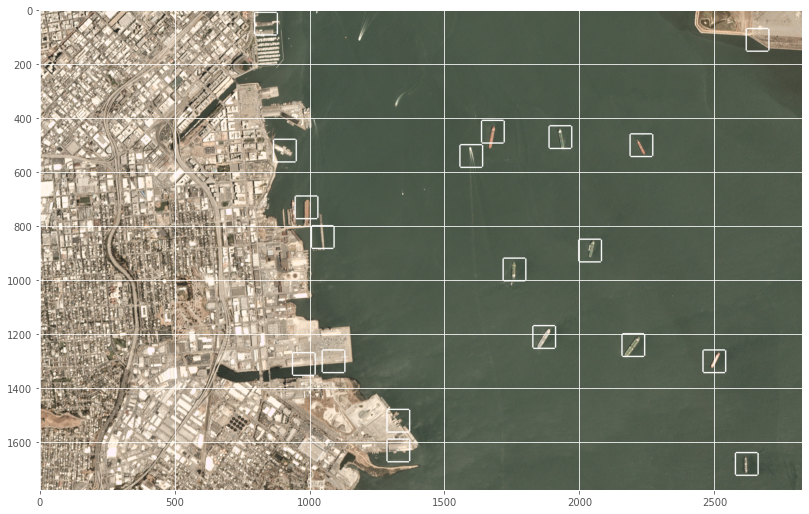

In [29]:
#With Dropout
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

plt.show()

Its interesting to see where the false alarms occured - typically on areas with a strong linear feature that resembles the shape of a ship.it may be coz of overfitting. 